<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [6]:
print(boston_df.head())

   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  


Text(0.5, 1.0, "Median value of owner-occupied homes in $1000's")

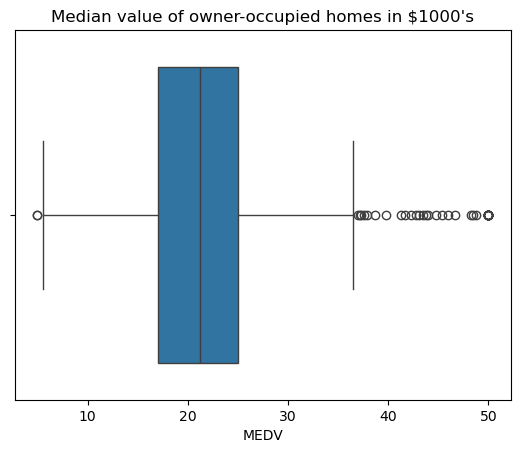

In [25]:
ax=sns.boxplot(data=boston_df, x="MEDV")
pyplot.title("Median value of owner-occupied homes in $1000's")

Text(0.5, 1.0, 'bar plot for the Charles river variables')

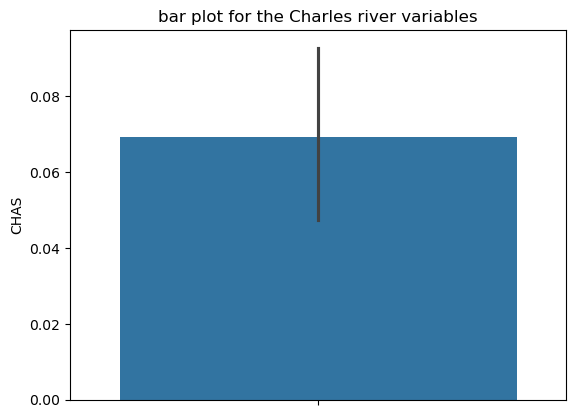

In [26]:
sns.barplot(data=boston_df, y="CHAS")
pyplot.title("bar plot for the Charles river variables")

Text(0.5, 1.0, 'Distribution of Median Home Value (MEDV) by Age Group of Properties')

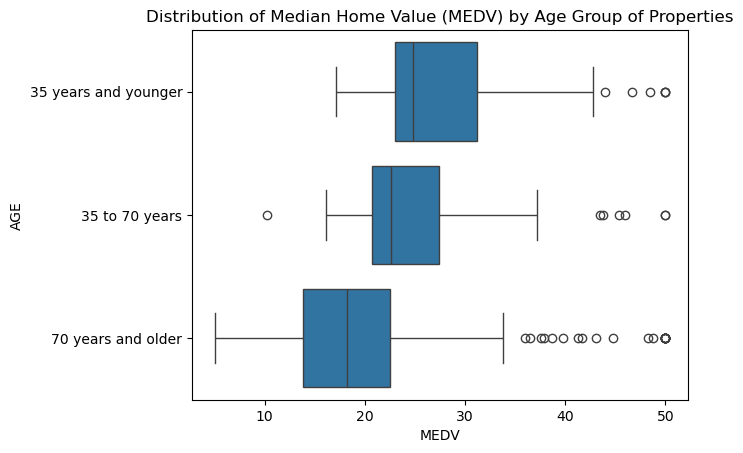

In [27]:
sns.boxplot(x= boston_df['MEDV'], y=pd.cut(boston_df['AGE'],bins=[0,35,70,100], labels=['35 years and younger', '35 to 70 years', '70 years and older']))
pyplot.title("Distribution of Median Home Value (MEDV) by Age Group of Properties")

Text(0.5, 1.0, 'relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')

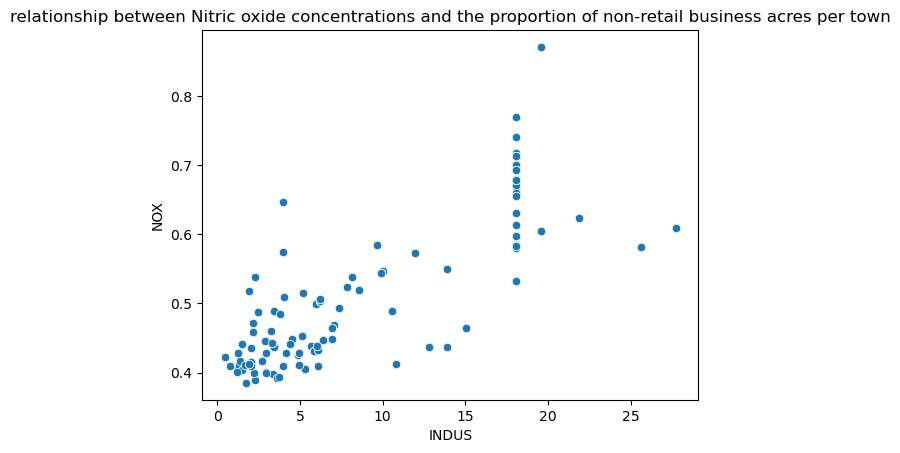

In [29]:
sns.scatterplot(y=boston_df['NOX'], x=boston_df['INDUS'])
pyplot.title("relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town")

Text(0.5, 1.0, 'histogram for the pupil to teacher ratio variable')

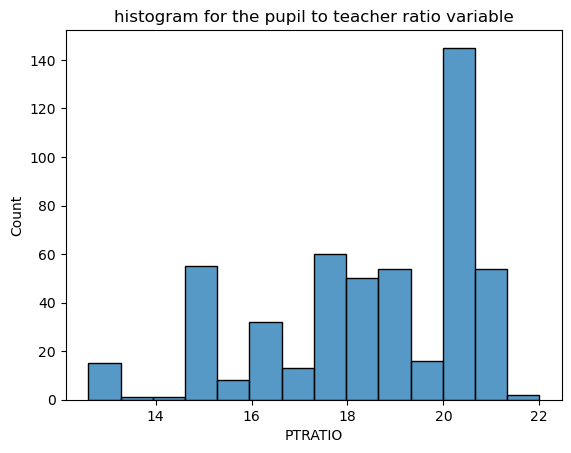

In [30]:
sns.histplot(x=boston_df['PTRATIO'])
pyplot.title("histogram for the pupil to teacher ratio variable")

<Axes: xlabel='MEDV', ylabel='Count'>

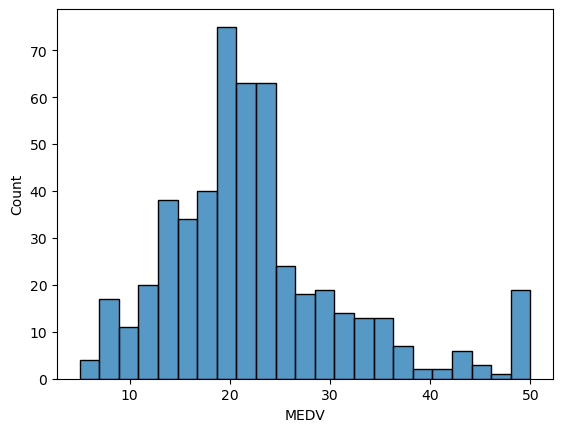

In [36]:
# Check if variable MEDV is distributed normaly
sns.histplot(boston_df["MEDV"])

In [38]:
#Null Hypothesis = There is no difference between the median age values

scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==0]['MEDV'], boston_df[boston_df['CHAS']==1]['MEDV'], equal_var=True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

Since P value is less than 0.05, we can say that there is a significant difference in median value of houses bounded by the Charles river 

In [ ]:
# Create a new column for age group
boston_df['AGE_GR'] = pd.cut(boston_df['AGE'], bins=[0,35,70,100], labels=['35 years and younger', '35 to 70 years', '70 years and older'])
print(boston_df.head())

   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV              AGE_GR  
0  296.0     15.3   4.98  24.0      35 to 70 years  
1  242.0     17.8   9.14  21.6  70 years and older  
2  242.0     17.8   4.03  34.7      35 to 70 years  
3  222.0     18.7   2.94  33.4      35 to 70 years  
4  222.0     18.7   5.33  36.2      35 to 70 years  


In [41]:
# Null Hypothesis = there no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

scipy.stats.f_oneway(boston_df[boston_df['AGE_GR']=='35 years and younger']['MEDV'], boston_df[boston_df['AGE_GR']=='35 to 70 years']['MEDV'], boston_df[boston_df['AGE_GR']=='70 years and older']['MEDV'])

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

Since P value is much less than 0.05, there is significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

In [42]:
# Null Hypothesis = There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.763651446920915, pvalue=7.913361061241167e-98)

Since P value is much less than 0.05, there is significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           1.21e-08
Time:                        11:24:06   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

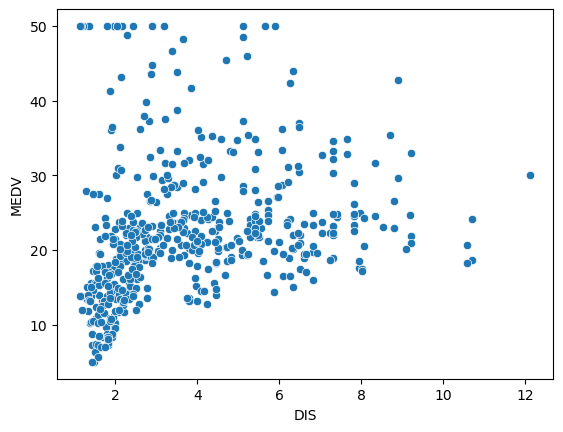

In [45]:
# Null Hypothesis = There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes

X= boston_df['DIS']
y=boston_df['MEDV']

sns.scatterplot(x=X, y=y)

X=sm.add_constant(X)
model=sm.OLS(y,X).fit()
predictions=model.predict(X)

print(model.summary())

Since P value is much less than 0.05, There is significant impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes